<a href="https://colab.research.google.com/github/happy-table/Machine-Learning/blob/main/PCA%20clusttering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
x = df.drop(['species'], axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
y = df['target']
y.head()


,target
0,0
1,0
2,0
3,0
4,0


## Fitting the PCA clustring to the dataset with n=2

In [ ]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)   #Number of components to keep
y_means = model.fit_transform(x)
print(y_means.shape)
y_means


(150, 2)


array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

## Variance Percentage

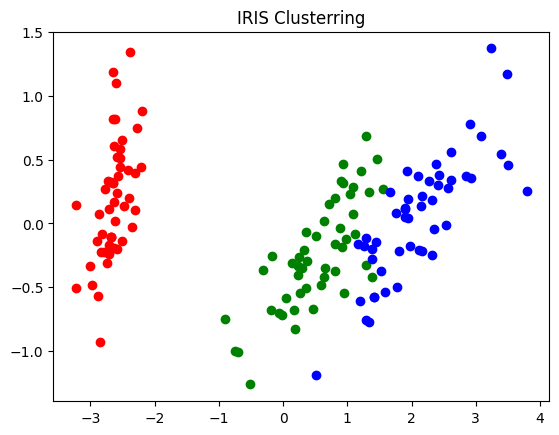

In [ ]:
plt.figure()
colors = ['red','green','blue']
for i in range(len(colors)):
    xs= y_means[:,0][y==i]
    ys= y_means[:,1][y==i]
    plt.scatter(xs,ys,c=colors[i])

plt.title('IRIS Clusterring')
plt.show()

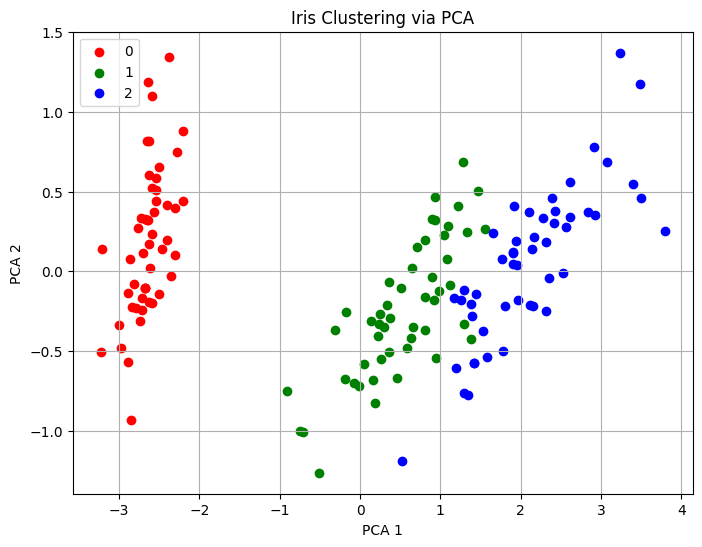

In [ ]:
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
labels = df.target.value_counts().index

for i in range(len(colors)):
    xs = y_means[y == i, 0]
    ys = y_means[y == i, 1]
    plt.scatter(xs, ys, color=colors[i], label=labels[i])

plt.title('Iris Clustering via PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid(True)
plt.show()

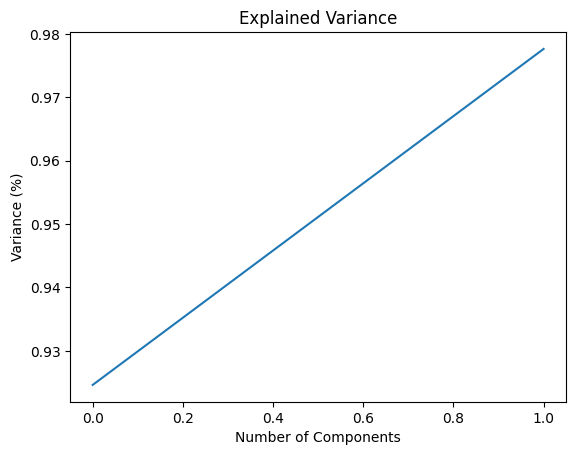

In [ ]:
plt.figure()
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()